# Data
Some information about features of the dataset

- `dateCrawled`: Date the car was crawled. (Date)
- `name`: Name of the car. (String)
- `seller`: Type of seller (private or dealer). (String)
- `offerType`: Type of offer (e.g. sale, repair, etc.). (String)
- `price`: Price of the car. (Integer)
- `abtest`: Test type (A or B). (String)
- `vehicleType`: Type of vehicle (e.g. SUV, sedan, etc.). (String)
- `yearOfRegistration`: Year the car was registered. (Integer)
- `gearbox`: Type of gearbox (manual or automatic). (String)
- `powerPS`: Power of the car in PS. (Integer)
- `model`: Model of the car. (String)
- `kilometer`: Kilometers the car has been driven. (Integer)
- `monthOfRegistration`: Month the car was registered. (Integer)
- `fuelType`: Type of fuel (e.g. diesel, petrol, etc.). (String)
- `brand`: Brand of the car. (String)
- `notRepairedDamage`: Whether or not the car has any damage that has not been repaired. (String)
- `dateCreated`: Date the car was created. (Date)
- `nrOfPictures`: Number of pictures of the car. (Integer)
- `postalCode`: Postal code of the car. (Integer)
- `lastSeen`: Date the car was last seen. (Date)

## Some ideas to implement
- Analyze the relationship between car prices and age (year of registration) using a linear regression model to suggest which cars provide the best value for money.
- Use classification models to predict vehicle types based on features like powerPS, price, brand, etc.
- Compare and contrast seller types (private vs dealer) by analyzing prices, seller locations and other geographic information in order to give advice on which type of seller provides the best deals for customers

# Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.model_selection import train_test_split, KFold, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn. metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

from tqdm.notebook import tqdm
import joblib
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

%matplotlib inline 
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# EDA

In [151]:
df = pd.read_csv('../datasets/autos.csv')
df.shape

(371528, 21)

In [152]:
df.sample(5).T

,162252,212195,157183,300773,8861
index,162252,212195,157183,300773,8861
dateCrawled,2016-03-21 09:57:36,2016-03-07 18:38:21,2016-03-19 19:51:52,2016-03-26 10:53:43,2016-03-27 17:55:37
name,Verkaufe_VW_Passat_35i_TÜV_bis_11.17,Volkswagen_Passat_Variant_2.0_TDI_DPF_DSG_High...,Peugeot_206+,Mondeo_Kombi_CDI_patherschwarz,Volkswagen_Golf_Plus_1.4_TSI_DSG_Life
seller,privat,privat,privat,privat,privat
offerType,Angebot,Angebot,Angebot,Angebot,Angebot
price,700,7900,3850,5700,16250
abtest,control,control,control,test,test
vehicleType,NaN,kombi,kleinwagen,kombi,bus
yearOfRegistration,2017,2008,2009,2007,2013
gearbox,manuell,automatik,manuell,NaN,automatik


In [153]:
for col in df.columns:
    print(col, df[col].nunique())

index 371528
dateCrawled 280500
name 233531
seller 2
offerType 2
price 5597
abtest 2
vehicleType 8
yearOfRegistration 155
gearbox 2
powerPS 794
model 251
kilometer 13
monthOfRegistration 13
fuelType 7
brand 40
notRepairedDamage 2
dateCreated 114
nrOfPictures 1
postalCode 8150
lastSeen 182806


Number of unique value of **monthOfRegistration** is 13, which is unreal, we need to examine this later

In [154]:
df['monthOfRegistration'].value_counts().sort_index()

monthOfRegistration
0     37675
1     24561
2     22403
3     36170
4     30918
5     30631
6     33167
7     28958
8     23765
9     25074
10    27337
11    25489
12    25380
Name: count, dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

- **dateCrawl** and **lastSeen** need to convert into DateTime data type, we can calculate the time it takes to sell a car
- Because **seller**, **offerType**, **abTest**, **gearbox**, **notRepairDamage** only have 2 unique values, so we can consider to transform these features to binary form
- Some features such as **vehicleType** and **fuelType** can be encode by OneHotEncoding
- **DateCreated** is the time when the car is created, for simple, we can just use only year value of this feature
- **postalCode** need to convert into string data type

- Some categorical feature that have a large number of unique values can be process in different ways:
    - **name** has 233531 unique values -> we can consider about binning method
    - **model** has 251 unique values
    - **brand** has 40 unique values

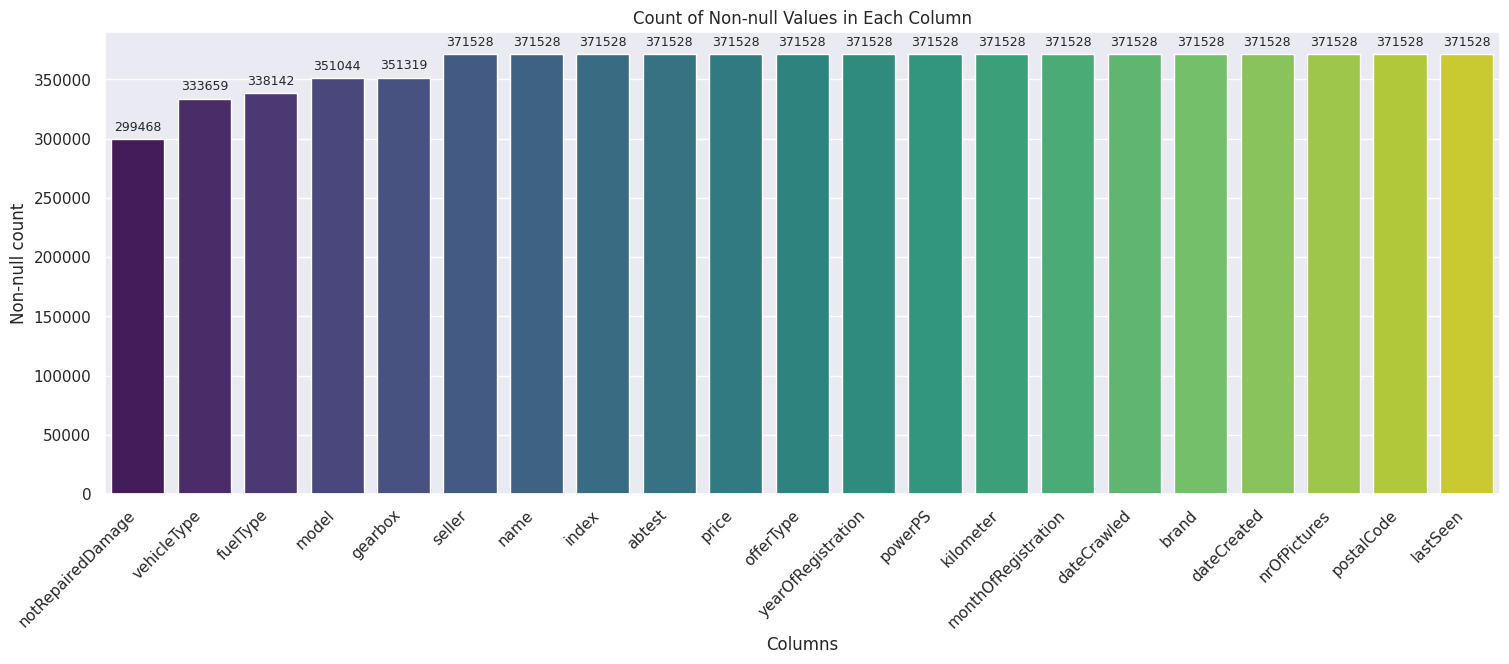

In [156]:
plt.figure(figsize=(18, 6))

notnull_counts = df.notnull().sum().sort_values(ascending=True)

fig = sns.barplot(x=notnull_counts.index, y=notnull_counts.values, palette='viridis')

for index, value in enumerate(notnull_counts.values):
    plt.text(index, value + 0.02 * max(notnull_counts.values), f"{value}", ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')  
plt.xlabel("Columns")
plt.ylabel("Non-null count")  
plt.title("Count of Non-null Values in Each Column")
plt.show()

As we can see, there're some missing values in 
- **notRepairedDamage**: ~ 72.000 sammples (20%)
- **vehicleType**, **fuelType**: ~ 37.000 samples (10%)
- **model**, **gearbox**: ~20.000 samples (5,52%) 

In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,371528.00,185763.50,107251.04,0.00,92881.75,185763.50,278645.25,371527.00
price,371528.00,17295.14,3587953.74,0.00,1150.00,2950.00,7200.00,2147483647.00
yearOfRegistration,371528.00,2004.58,92.87,1000.00,1999.00,2003.00,2008.00,9999.00
powerPS,371528.00,115.55,192.14,0.00,70.00,105.00,150.00,20000.00
kilometer,371528.00,125618.69,40112.34,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371528.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
nrOfPictures,371528.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
postalCode,371528.00,50820.67,25799.08,1067.00,30459.00,49610.00,71546.00,99998.00


- **price**: value of 0 in min can be potential outlier caused by error in data collecting process. An abnormally high max value and std also need to review
- **yearOfRegistration** have the min value is 1000 max value is 9999, which can be an input error
- **powerPS** equals to 0 maybe represent for a broken car or it can be another error input. Moreover, the max value of 20.000 in powerPS is nearly impossible for a normal used car, we need to review this case.
- **nrOfPictures**: all values of this feature is likely equal to 0. we can consider remove this feature because it does not have any contribution to prediction of model


In [159]:
df[df['yearOfRegistration']>2025].head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
13576,13576,2016-03-29 18:39:40,Verkaufe_DESIGN_Streifen_/_Aufkleber_VW__Opel_...,privat,Angebot,49,control,NaN,5000,NaN,...,golf,5000,12,NaN,volkswagen,NaN,2016-03-29 00:00:00,0,74523,2016-04-06 04:16:14
15894,15894,2016-03-14 00:52:02,Alles_anbieten,privat,Angebot,0,control,NaN,9999,NaN,...,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-13 00:00:00,0,32689,2016-03-21 23:46:46
16657,16657,2016-04-02 11:55:48,quad_neu_t?v_tauschen_gegen_Auto,privat,Angebot,1700,test,NaN,3200,NaN,...,NaN,5000,0,NaN,sonstige_autos,NaN,2016-04-02 00:00:00,0,33649,2016-04-06 09:46:13
18121,18121,2016-03-23 16:43:29,Opel_GT_Karosserie_mit_Brief!,privat,Angebot,700,test,NaN,9999,NaN,...,andere,10000,0,NaN,opel,NaN,2016-03-23 00:00:00,0,21769,2016-04-05 20:16:15
18196,18196,2016-03-06 16:06:20,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,privat,Angebot,6500,control,NaN,8888,NaN,...,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-06 00:00:00,0,55262,2016-03-30 20:46:55


In [160]:
df[df['yearOfRegistration']<1886].head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
649,649,2016-03-16 16:55:09,195/55_r15_sommerreifen_alu,privat,Angebot,0,control,NaN,1111,NaN,...,NaN,5000,0,NaN,opel,NaN,2016-03-16 00:00:00,0,44628,2016-03-20 16:44:37
16859,16859,2016-03-29 23:42:16,Ford_mondeo_mk3_2.0tdc?_tubo_lader,privat,Angebot,190,control,NaN,1000,NaN,...,mondeo,5000,0,NaN,ford,NaN,2016-03-29 00:00:00,0,47166,2016-04-06 10:44:58
19125,19125,2016-03-09 17:49:44,Subaru_Impreza_Wrx_2.0,privat,Angebot,7999,test,NaN,1500,manuell,...,impreza,5000,3,NaN,subaru,NaN,2016-03-09 00:00:00,0,53577,2016-03-15 05:15:17
35964,35964,2016-04-01 06:02:10,UNFAL_Auto,privat,Angebot,450,control,NaN,1800,NaN,...,NaN,5000,2,NaN,mitsubishi,nein,2016-04-01 00:00:00,0,63322,2016-04-01 09:42:30
40733,40733,2016-03-19 23:54:40,Suche_einen_Trabant_mit_12v,privat,Angebot,1234,control,NaN,1234,NaN,...,NaN,5000,1,NaN,trabant,NaN,2016-03-19 00:00:00,0,38518,2016-04-06 03:15:22


In [161]:
df[df['yearOfRegistration']>2025].shape[0], df[df['yearOfRegistration']<1980].shape[0]

(114, 4119)

We have 114 error inputs in **yearOfRegistration** that we need to remove

In [162]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [163]:
df.tail(5).T

,371523,371524,371525,371526,371527
index,371523,371524,371525,371526,371527
dateCrawled,2016-03-14 17:48:27,2016-03-05 19:56:21,2016-03-19 18:57:12,2016-03-20 19:41:08,2016-03-07 19:39:19
name,Suche_t4___vito_ab_6_sitze,Smart_smart_leistungssteigerung_100ps,Volkswagen_Multivan_T4_TDI_7DC_UY2,VW_Golf_Kombi_1_9l_TDI,BMW_M135i_vollausgestattet_NP_52.720____Euro
seller,privat,privat,privat,privat,privat
offerType,Angebot,Angebot,Angebot,Angebot,Angebot
price,2200,1199,9200,3400,28990
abtest,test,test,test,test,control
vehicleType,NaN,cabrio,bus,kombi,limousine
yearOfRegistration,2005,2000,1996,2002,2013
gearbox,NaN,automatik,manuell,manuell,manuell


**dateCrawled** and **dateCreated** look nearly the same at day, month, year values, so I think we can drop the **dateCreated** column 

<Axes: title={'center': 'Not Repaired Damage'}>

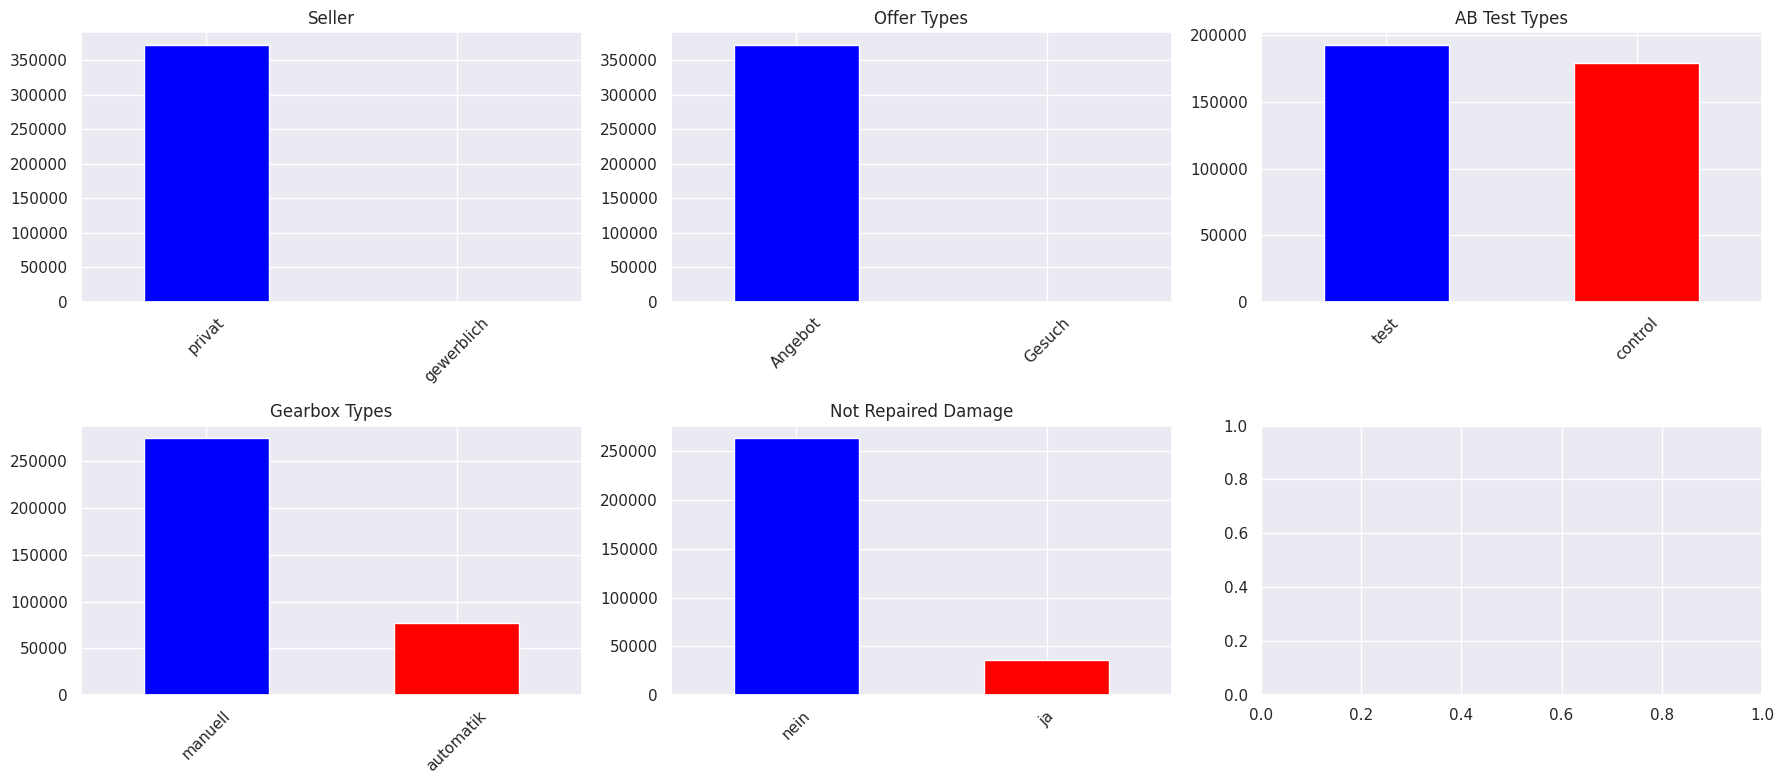

In [164]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8), tight_layout=True)

df['seller'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['blue', 'red'], title='Seller', rot=45, xlabel='')

df['offerType'].value_counts().plot(kind='bar', ax=axes[0,1], color=['blue', 'red'], title='Offer Types', rot=45, xlabel='')

df['abtest'].value_counts().plot(kind='bar', ax=axes[0, 2], color=['blue', 'red'], title='AB Test Types', rot=45, xlabel='')

df['gearbox'].value_counts().plot(kind='bar', ax=axes[1,0], color=['blue', 'red'], title='Gearbox Types', rot=45, xlabel='')

df['notRepairedDamage'].value_counts().plot(kind='bar', ax=axes[1,1], color=['blue', 'red'], title='Not Repaired Damage', rot=45, xlabel='')

Since except for 3 rows all the other ads are private, I'm also gonna drop the seller column. It's basically useless.
As shown, the offerTyple column is also useless so I'm gonna drop this one, too.
Also, I noticed that the yearOfRegistration column has some odd and extreme values. So, I'm gonna define a solid range for this field. I think a range between 1980 and 2023 is decent.

## Drop some potential outlier and some features do not have any value

In [165]:
# calculate the age of the car (in years)
df['age'] = datetime.now().year - df['yearOfRegistration']

# calculate the average usage of the car (km/year)
df['avg_usage'] = df['kilometer'] / df['age']

# calculate the time it took to sell the car (days)
df['time_to_sell'] = df['lastSeen'] - df['dateCreated']
df['time_to_sell'] = df['time_to_sell'].dt.days

# Binary encoding
df['notRepairedDamage'] = df['notRepairedDamage'].map({'ja': 1, 'nein': 0})

# drop redundant columns
df.drop(['index', 'seller', 'offerType', 'nrOfPictures', 'dateCrawled', 'lastSeen', 'postalCode'], axis=1, inplace=True)
df = df[df['yearOfRegistration'].between(1980, 2025)]

# Translate from German to English
df['fuelType'] = df['fuelType'].map({'benzin': 'petrol', 'diesel': 'diesel', 'lpg': 'lpg', 'cng': 'cng', 'hybrid': 'hybrid', 'elektro': 'electric', 'andere': 'other'})
df['gearbox'] = df['gearbox'].map({'manuell': 'manual', 'automatik': 'automatic'})
df['vehicleType'] = df['vehicleType'].map({'limousine': 'sedan', 'kleinwagen': 'small car', 'kombi': 'station wagon', 'bus': 'bus', 'cabrio': 'convertible', 'coupe': 'coupe', 'suv': 'suv', 'andere': 'other'})

In [166]:
df.head().T

,0,1,2,3,4
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3TÜRER,Skoda_Fabia_1.4_TDI_PD_Classic
price,480,18300,9800,1500,3600
abtest,test,test,test,test,test
vehicleType,NaN,coupe,suv,small car,small car
yearOfRegistration,1993,2011,2004,2001,2008
gearbox,manual,manual,automatic,manual,manual
powerPS,0,190,163,75,69
model,golf,NaN,grand,golf,fabia
kilometer,150000,125000,125000,150000,90000
monthOfRegistration,0,5,8,6,7


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367295 entries, 0 to 371527
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 367295 non-null  object        
 1   price                367295 non-null  int64         
 2   abtest               367295 non-null  object        
 3   vehicleType          330002 non-null  object        
 4   yearOfRegistration   367295 non-null  int64         
 5   gearbox              348013 non-null  object        
 6   powerPS              367295 non-null  int64         
 7   model                347902 non-null  object        
 8   kilometer            367295 non-null  int64         
 9   monthOfRegistration  367295 non-null  int64         
 10  fuelType             334827 non-null  object        
 11  brand                367295 non-null  object        
 12  notRepairedDamage    296565 non-null  float64       
 13  dateCreated        

In [168]:
df.isnull().sum()

name                       0
price                      0
abtest                     0
vehicleType            37293
yearOfRegistration         0
gearbox                19282
powerPS                    0
model                  19393
kilometer                  0
monthOfRegistration        0
fuelType               32468
brand                      0
notRepairedDamage      70730
dateCreated                0
age                        0
avg_usage                  0
time_to_sell               0
dtype: int64

In [169]:
df.nunique()

name                   230155
price                    5556
abtest                      2
vehicleType                 8
yearOfRegistration         40
gearbox                     2
powerPS                   785
model                     250
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
age                        40
avg_usage                 337
time_to_sell              114
dtype: int64

In [170]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)

Numeric features: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'age', 'avg_usage', 'time_to_sell']
Categorical features: ['name', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand']


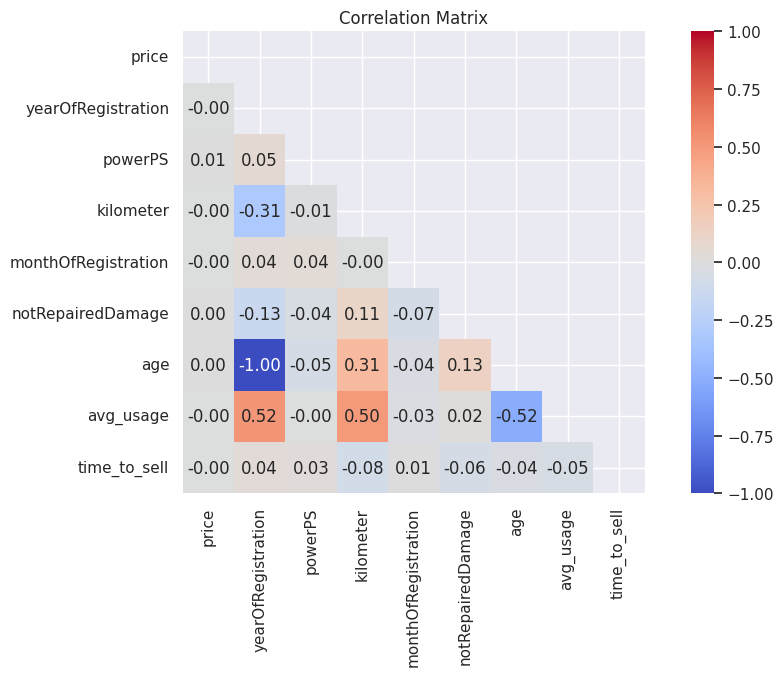

In [171]:
df_corr = df[numeric_features].corr()
trimask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
sns.heatmap(
    df_corr,
    vmin=-1, vmax=1, center=0,
    square=True,
    mask=trimask,
    annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [172]:
correlation_with_price = df_corr['price']
sorted_positive_correlation = correlation_with_price.drop('price').sort_values(ascending=False)

print("Top 4 features that are positively correlated with price:")
print(sorted_positive_correlation.head(4))

sorted_negative_correlation = correlation_with_price.drop('price').sort_values(ascending=True)
print('\nTop 4 features that are negatively correlated with price:')
print(sorted_negative_correlation.head(4))

Top 4 features that are positively correlated with price:
powerPS              0.01
notRepairedDamage    0.00
age                  0.00
time_to_sell        -0.00
Name: price, dtype: float64

Top 4 features that are negatively correlated with price:
monthOfRegistration   -0.00
yearOfRegistration    -0.00
avg_usage             -0.00
kilometer             -0.00
Name: price, dtype: float64


**yearOfRegistration** is calculated by **age** so we can choose one of them.

I will take advantage of positive correlation with **price** of **powerPS**; **kilometer** and **age** with negative correlation

In [173]:
numeric_features = ['powerPS', 'kilometer', 'age']

In [174]:
df[categorical_features].nunique()

name           230155
abtest              2
vehicleType         8
gearbox             2
model             250
fuelType            7
brand              40
dtype: int64

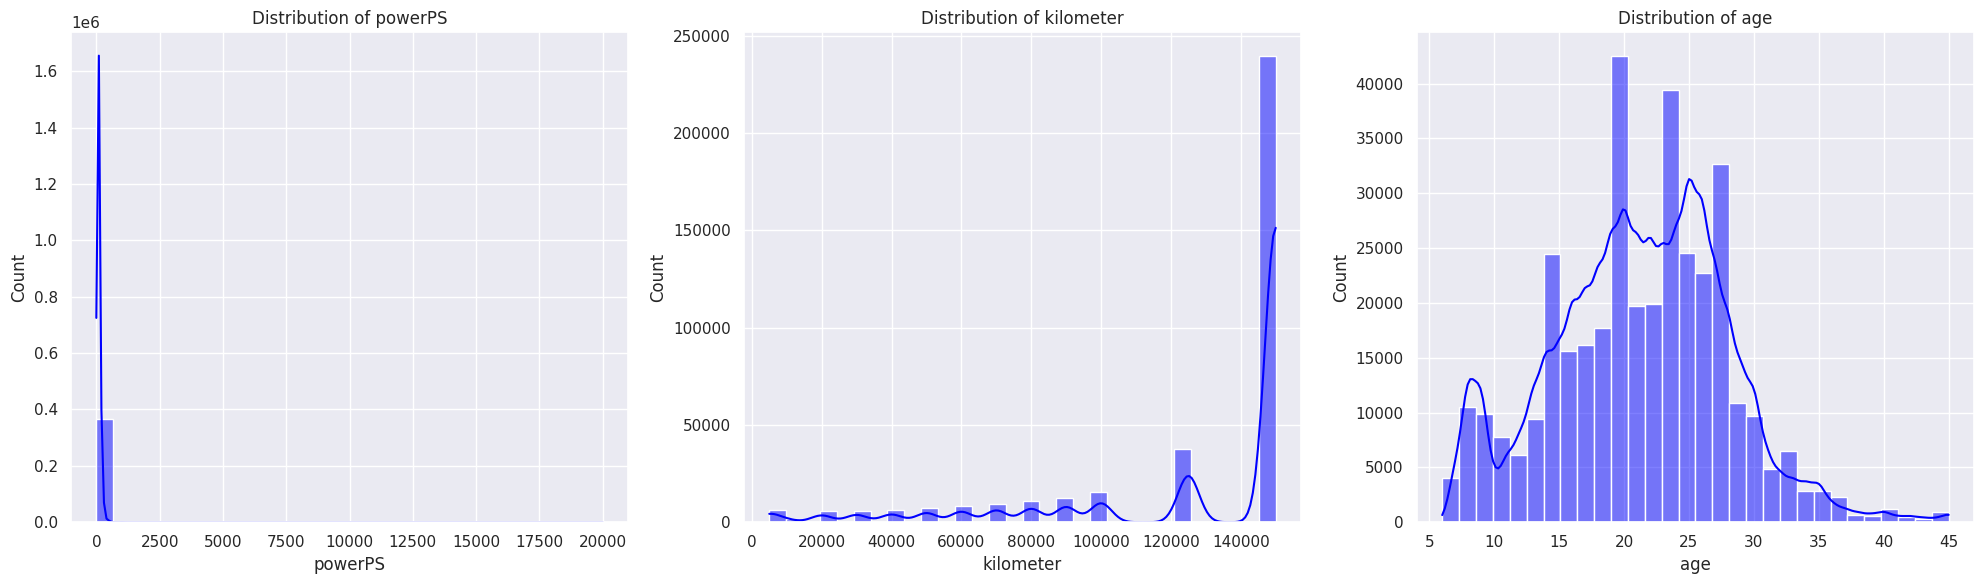

In [175]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), tight_layout=True)
for col in numeric_features:
    plt.subplot(1, 3, numeric_features.index(col)+1)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {col}")
plt.show()

Still have many outliers in PowerPS and kilometer

In [176]:
df['kilometer'].describe()

count   367295.00
mean    126130.98
std      39638.14
min       5000.00
25%     125000.00
50%     150000.00
75%     150000.00
max     150000.00
Name: kilometer, dtype: float64

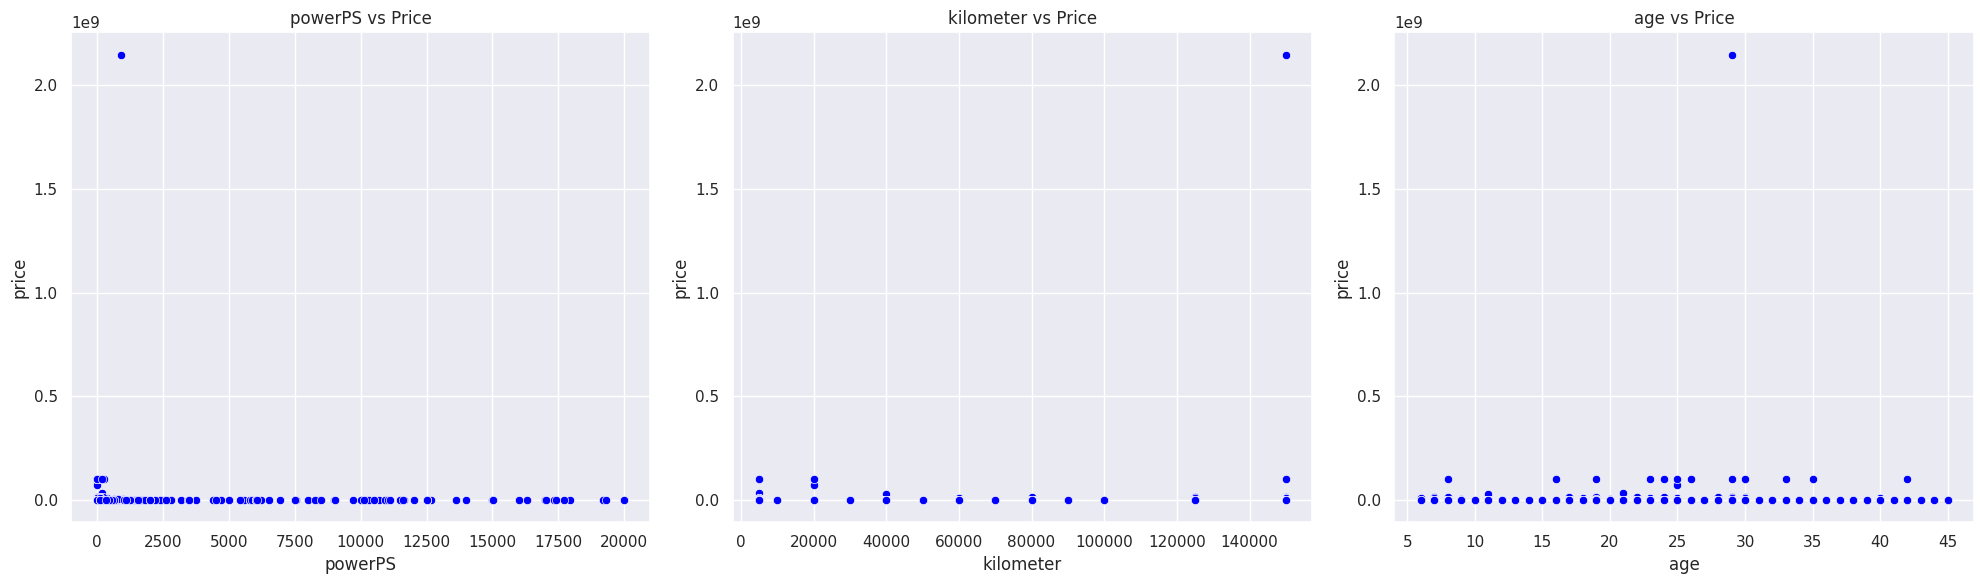

In [177]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), tight_layout=True)
for col in numeric_features:
    plt.subplot(1, 3, numeric_features.index(col)+1)
    sns.scatterplot(x=df[col], y=df['price'], color='blue')
    plt.title(f"{col} vs Price")
plt.show()

In [178]:
df_test = df.copy()
df_test['powerPS'].between(0, 200).sum()


np.int64(335782)

In [179]:
df_test.loc[df_test['powerPS'].between(600, 800)]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,age,avg_usage,time_to_sell
2735,Ferrari_California_F1,120000,test,convertible,2012,automatic,666,NaN,20000,7,petrol,sonstige_autos,0.00,2016-03-16,13,1538.46,5
3923,Top_Golf_4_mit_20_Monaten_Tuev,0,control,NaN,2017,manual,750,NaN,150000,8,petrol,smart,0.00,2016-03-21,8,18750.00,3
6593,Daewoo_Chevrollet_Matiz_2002_zu_verkaufen,599,control,small car,2002,manual,603,matiz,5000,11,petrol,chevrolet,1.00,2016-03-31,23,217.39,1
6808,Fiat_Grande_Punto_Letzter_Tag_!,3000,control,small car,2009,manual,771,punto,125000,0,petrol,fiat,NaN,2016-03-14,16,7812.50,0
6953,Auto_Opel_Corsa_B,600,control,small car,1996,manual,603,corsa,150000,8,petrol,opel,1.00,2016-03-31,29,5172.41,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357847,Corvette_C6_Kompressor_V8_631PS,36999,control,coupe,2005,manual,631,NaN,60000,7,NaN,sonstige_autos,0.00,2016-03-06,20,3000.00,17
364171,Ferrari_FXX,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,0.00,2016-04-04,19,263.16,1
366861,Ferrari_FXX__unfallfrei__perfekter_Zustand,3895000,test,coupe,2006,NaN,799,NaN,5000,4,petrol,sonstige_autos,0.00,2016-03-21,19,263.16,1
367041,Maserati_MC12,1600000,test,coupe,2005,NaN,625,NaN,10000,4,petrol,sonstige_autos,0.00,2016-03-24,20,500.00,0


There are some car with unreal powerPS and some cars have fake powerPS (small and cheap cars with big powerPS), e.g., Auto_Opel_Corsa_B in reality only have 79 PS.
We can consider and remove cheap car with enormous powerPS

In [180]:
df[(df['powerPS'] > 400) ].sort_values(by='price', ascending=True).head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,age,avg_usage,time_to_sell
4515,Suche_BMW_M5_e60_oder_AMG_e55,0,control,sedan,2007,manual,500,5er,100000,4,NaN,bmw,0.00,2016-03-05,18,5555.56,31
11577,Fiat_Lancia_Delta_HPE_1_6_16v,0,test,sedan,1998,manual,10317,andere,150000,8,petrol,fiat,0.00,2016-03-25,27,5555.56,7
67809,Audi_s3_mit_Motor_Neuaufbau_gt3076,0,control,NaN,2017,manual,500,a3,150000,2,petrol,audi,NaN,2016-03-31,8,18750.00,6
299479,VW_Touran_2_0_170_Pa_7_sitze,0,test,bus,2006,manual,1700,touran,150000,9,diesel,volkswagen,0.00,2016-03-22,19,7894.74,4
89370,PT_Cruiser_Crd_2.0_fuer_Kurzentschlossene_bis_...,0,test,NaN,2016,manual,15016,ptcruiser,150000,12,diesel,chrysler,NaN,2016-03-17,9,16666.67,3


## Drop and clip some potential outliers

In [181]:
# drop all rows with missing values
df = df.dropna()

# drop rows with price less than 100 and greater than 2,000,000 and powerPS less than 75 and greater than 1000
df = df[(df['price'].between(100, 2000000)) & (df['powerPS'].between(75, 1000))]

# drop rows with price less than 1000 and powerPS greater than 400
df = df.drop(
    df[((df['powerPS'] > 400) & (df['price'] < 10000)) | (df['powerPS'] > 1000)].index
)
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,age,avg_usage,time_to_sell
3,GOLF_4_1_4__3TÜRER,1500,test,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,0.00,2016-03-17,24,6250.00,0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,sedan,1995,manual,102,3er,150000,10,petrol,bmw,1.00,2016-04-04,30,5000.00,2
6,Peugeot_206_CC_110_Platinum,2200,test,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,0.00,2016-04-01,21,7142.86,4
10,Mazda_3_1.6_Sport,2000,control,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,0.00,2016-03-26,21,7142.86,11
11,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,control,station wagon,2005,manual,140,passat,150000,12,diesel,volkswagen,1.00,2016-04-07,20,7500.00,0


In [182]:
df['powerPS'].describe()

count   209195.00
mean       141.86
std         59.05
min         75.00
25%        102.00
50%        131.00
75%        170.00
max        871.00
Name: powerPS, dtype: float64

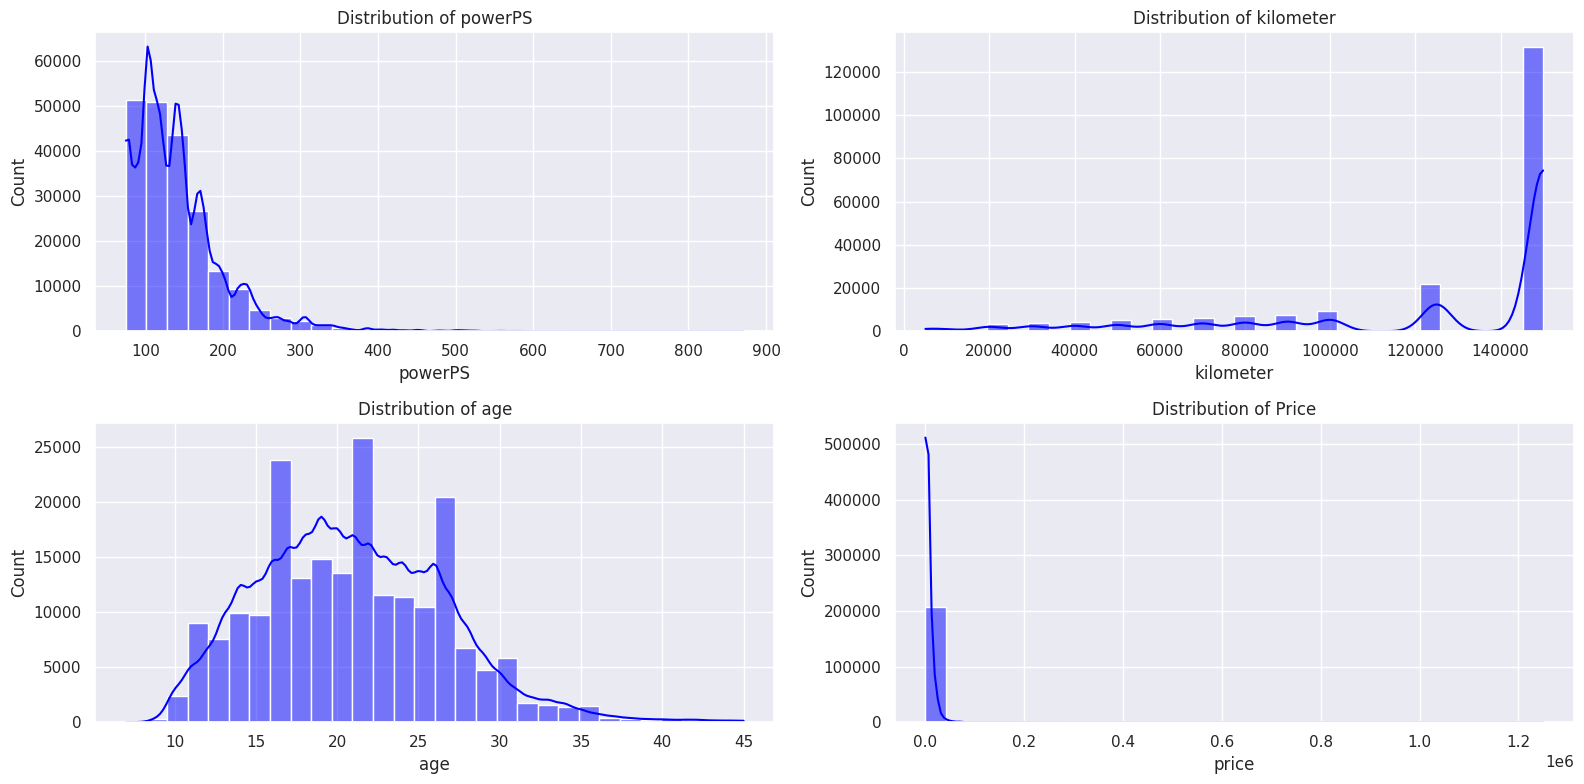

In [183]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8), tight_layout=True)
for col in numeric_features:
    plt.subplot(2, 2, numeric_features.index(col)+1)
    sns.histplot(df[col], color='blue', bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.subplot(2, 2, 4)
sns.histplot(df['price'], color='blue', bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()


<Axes: xlabel='powerPS', ylabel='Count'>

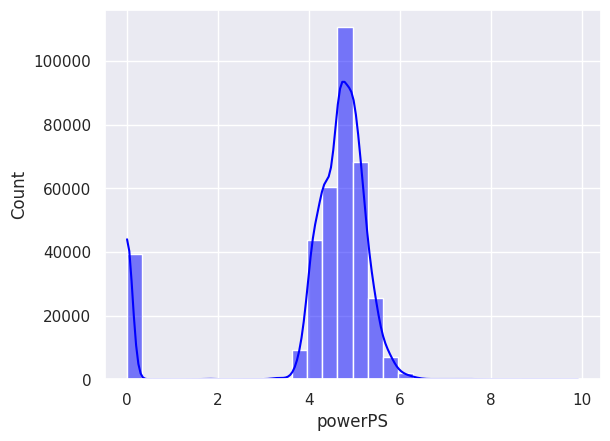

In [184]:
df_test['powerPS'] = df_test['powerPS'].apply(np.log1p)
sns.histplot(df_test['powerPS'], color='blue', bins=30, kde=True)

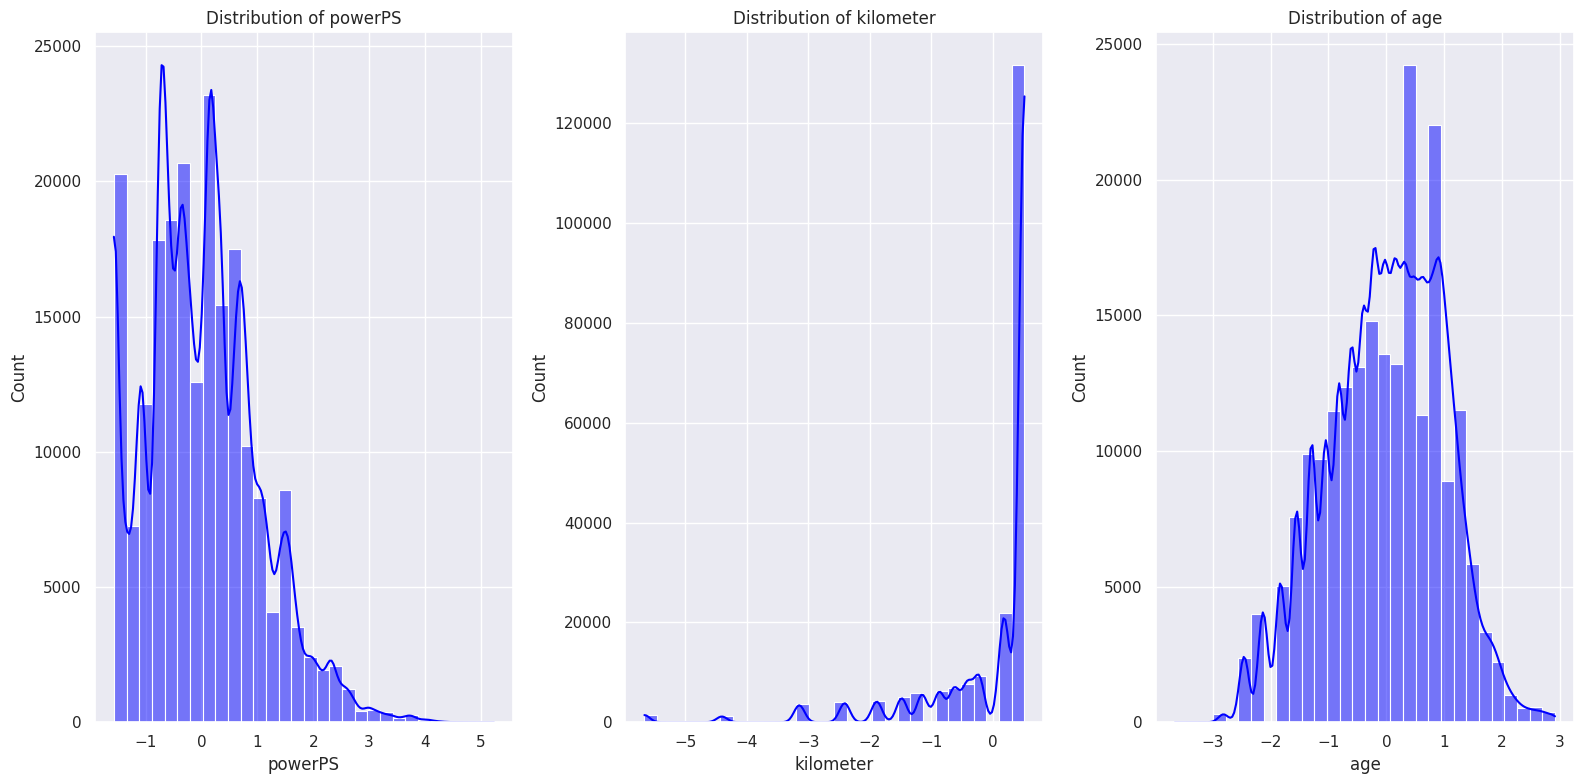

In [185]:
# Using Z-score 
df_test = df.copy()
df_test[numeric_features] = df_test[numeric_features].apply(np.log1p)
df_test[numeric_features] = StandardScaler().fit_transform(df_test[numeric_features])
fig, axes = plt.subplots(1, 3, figsize=(16, 8), tight_layout=True)
for col in numeric_features:
    plt.subplot(1, 3, numeric_features.index(col)+1)
    sns.histplot(df_test[col], color='blue', bins=30, kde=True)
    plt.title(f"Distribution of {col}")

## Categorical Features

In [186]:
categorical_features

['name', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

In [187]:
df[categorical_features].nunique()

name           118254
abtest              2
vehicleType         8
gearbox             2
model             245
fuelType            7
brand              38
dtype: int64

# TEMPORARY EXCLUDE NAME FEATURE

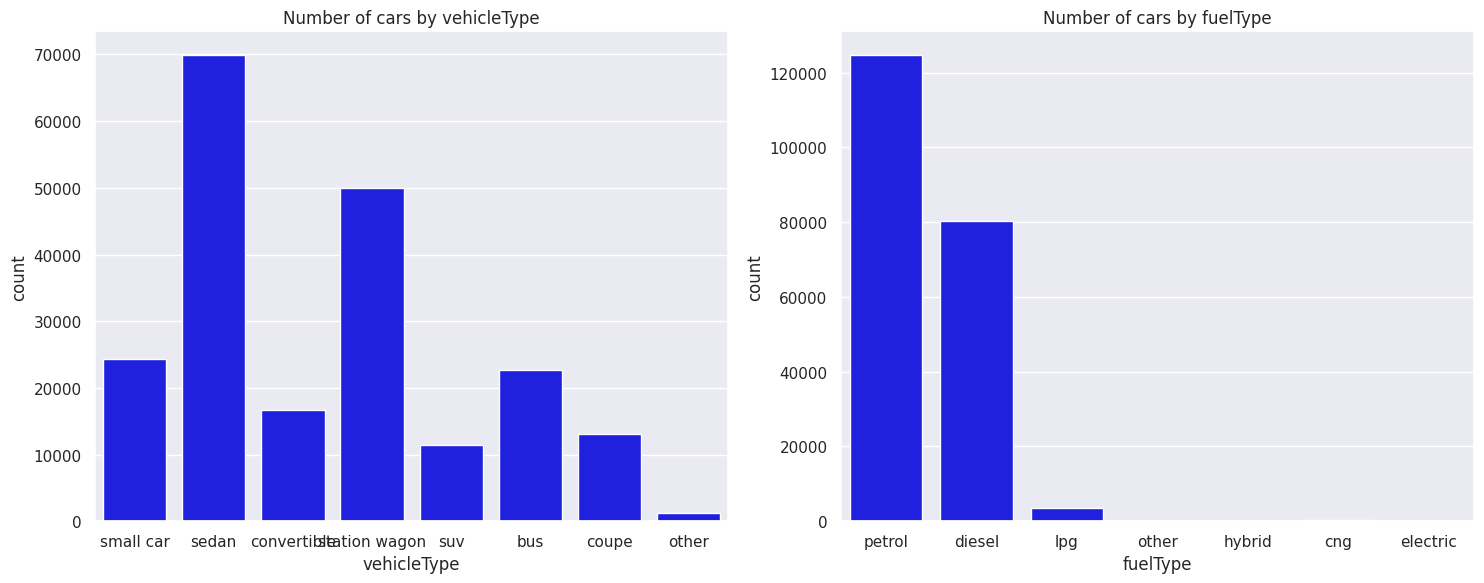

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
selected_cat_col = ['vehicleType', 'fuelType']

for col in selected_cat_col:
    plt.subplot(1, 2, selected_cat_col.index(col)+1)
    sns.countplot(x=df[col], color='blue')
    plt.title(f"Number of cars by {col}")

We can drop **lpg**, **hybrid**, **cng**, **electric** and **other** in **fuelType**

<Axes: xlabel='fuelType', ylabel='count'>

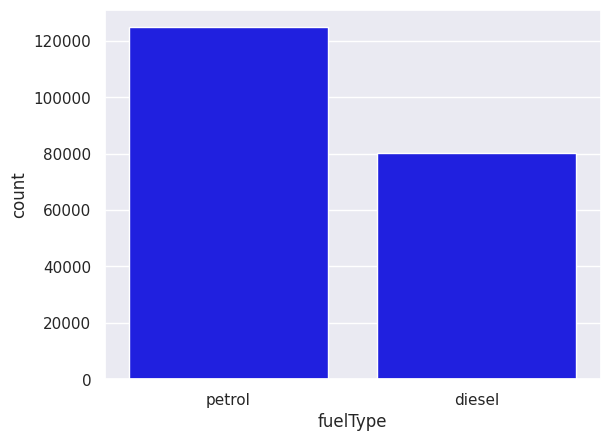

In [189]:
df = df[~df['fuelType'].isin(['lpg', 'cng', 'hybrid', 'electric', 'other'])]
sns.countplot(x=df['fuelType'], color='blue')

In [190]:
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'model', 'brand', 'fuelType']

In [ ]:
cat_name = categorical_features.copy()
cat_name.append('name')

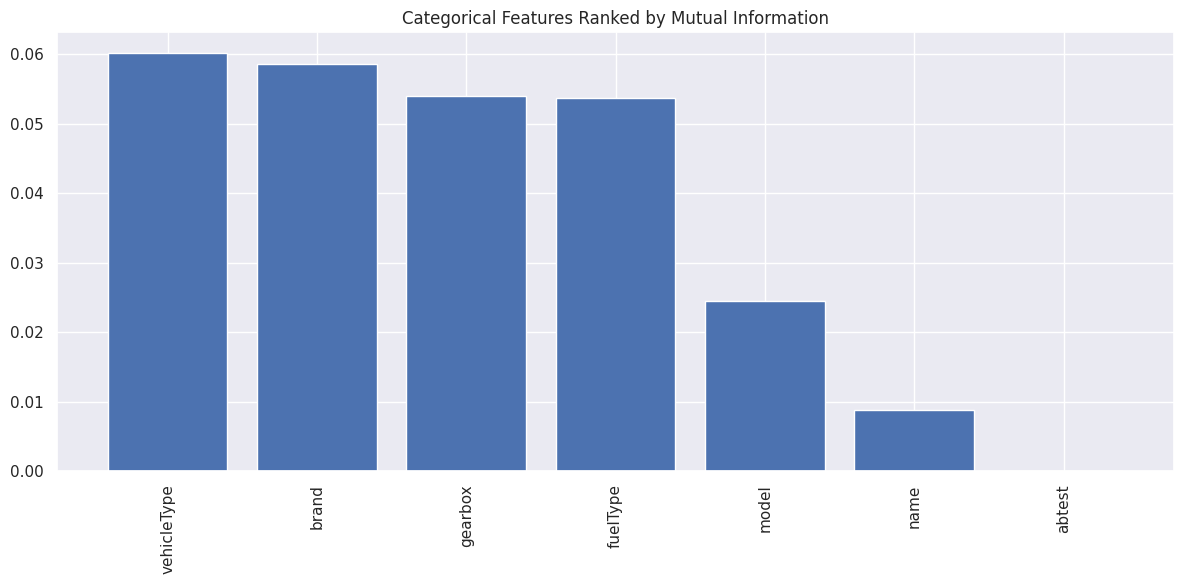

In [ ]:
feature_scores = {}

for feature in cat_name:
    encoded_feature = pd.get_dummies(df_test[feature], drop_first=True)
    
    mi_score = mutual_info_regression(encoded_feature, df_test['price'], random_state=42)
    
    feature_scores[feature] = np.sum(mi_score)

sorted_features = {k: v for k, v in sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 6))
plt.bar(sorted_features.keys(), sorted_features.values())
plt.xticks(rotation=90)
plt.title('Categorical Features Ranked by Mutual Information')
plt.tight_layout()
plt.show()

In [43]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=0.95)),
])

In [44]:
df_train = df[numeric_features + categorical_features + ['price']]
df_train.head()

,powerPS,kilometer,age,abtest,vehicleType,gearbox,model,brand,fuelType,price
3,75,150000,24,test,small car,manual,golf,volkswagen,petrol,1500
5,102,150000,30,test,sedan,manual,3er,bmw,petrol,650
6,109,150000,21,test,convertible,manual,2_reihe,peugeot,petrol,2200
10,105,150000,21,control,sedan,manual,3_reihe,mazda,petrol,2000
11,140,150000,20,control,station wagon,manual,passat,volkswagen,diesel,2799


In [45]:
X = df_train.drop('price', axis=1)
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164060, 9), (41015, 9), (164060,), (41015,))

In [46]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [47]:
cat_feature_names = preprocessor.named_transformers_['cat']['encode'].get_feature_names_out(categorical_features)

feature_names = np.concatenate([numeric_features, cat_feature_names])
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_train_transformed.head()

,powerPS,kilometer,age,abtest_control,abtest_test,vehicleType_bus,vehicleType_convertible,vehicleType_coupe,vehicleType_other,vehicleType_sedan,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,fuelType_diesel,fuelType_petrol
0,-0.18,0.64,-0.50,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,-0.79,-1.37,-0.85,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.84,0.01,-1.03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,-0.28,-0.87,0.89,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1.52,0.01,-1.03,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


After transform pipeline, the return dataframe will have 300 columns (dimensions), so we have to consider using dimension reduction algorithms like **PCA**

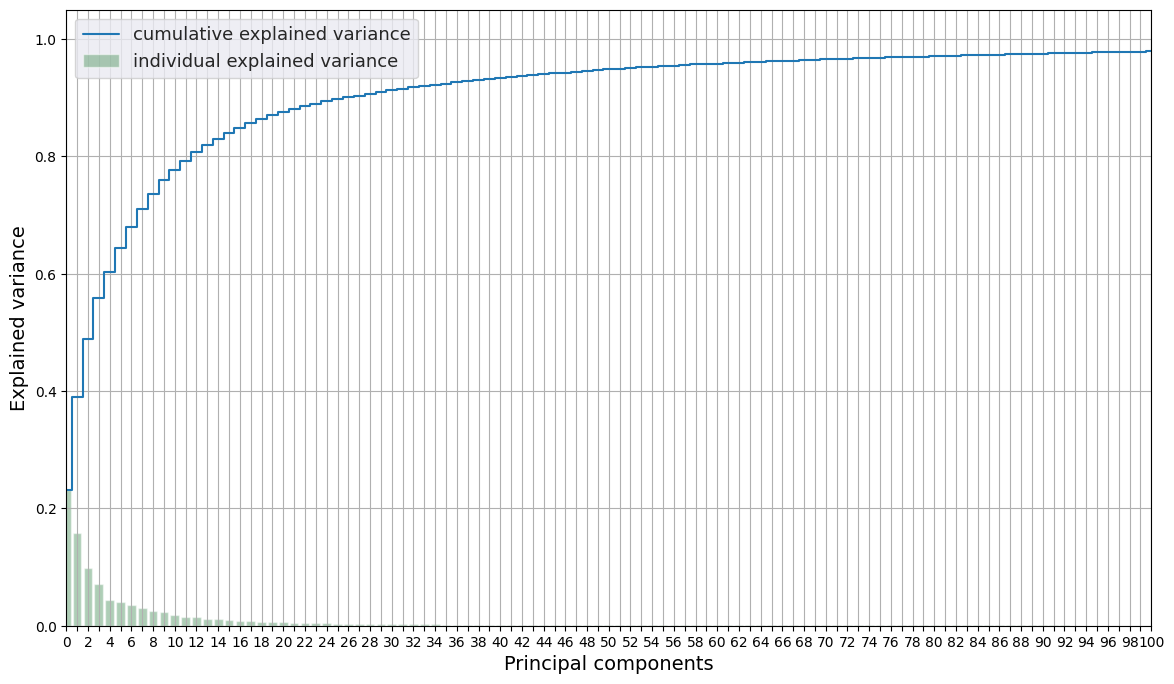

In [48]:
X_transformed = preprocessor.fit_transform(X_train)
pca = PCA().fit(X_transformed)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance')
# plt.title('PCA - Cumulative Explained Variance')
# plt.grid()
# plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
sns.set(font_scale=1)
plt.step(range(X_transformed.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot( pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);
plt.grid()

- Blue line (Cumulative Explained Variance): Shows how much of the total variance is retained as the number of principal components (PCs) increases. It helps identify the optimal number of components to keep.
- Green bars (Individual Explained Variance): Represent the variance contribution of each individual principal component. The first few PCs contribute the most variance, while later ones contribute less.

- To retain 95% of the variance, 30–35 PCs should be sufficient.
- To retain 99% of the variance, around 50 PCs are needed.
- If performance is a priority, choosing 20–30 PCs might be a good trade-off.


In [49]:
models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

In [50]:
scoring = {
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error),
    "RMSE": make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
}

In [51]:
results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in tqdm(models.items(), desc="Training Models", leave=True):
    print(f"Training {name}...")

    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    print(f"Cross validating {name}...")
    with tqdm(total=kf.get_n_splits(X), desc=f"Cross Validation {name}") as pbar:
        scores = cross_validate(model_pipeline, X, y, cv=kf, scoring=scoring, return_train_score=True, n_jobs=-1)
        pbar.update(kf.get_n_splits(X))
        
    print(f"Cross Validating done!  Scores: {scores}")

    results.append({
        "Model": name,
        "R2": scores["test_R2"].mean(),
        "MAE": scores["test_MAE"].mean(),
        "RMSE": scores["test_RMSE"].mean(),
        "Score Time": scores["score_time"].mean(),
        "Train_R2": scores["train_R2"].mean(),
        "Train MAE": scores["train_MAE"].mean(),
        "Train_RMSE": scores["train_RMSE"].mean(),
        "Fit Time": scores["fit_time"].mean(),
    })

    print(f"Training {name} done!")
    print()

Training Models:   0%|          | 0/4 [00:00<?, ?it/s]

Training RandomForestRegressor...
Cross validating RandomForestRegressor...


Cross Validation RandomForestRegressor:   0%|          | 0/5 [00:00<?, ?it/s]

Cross Validating done!  Scores: {'fit_time': array([293.46799088, 295.23211122, 285.89714789, 289.28253245,
       285.47564578]), 'score_time': array([1.71616745, 1.57226634, 1.81293416, 1.81733537, 1.77135754]), 'test_R2': array([0.44462728, 0.68013688, 0.45015222, 0.68929746, 0.66563638]), 'train_R2': array([0.91273067, 0.86325678, 0.89236063, 0.86232475, 0.87677619]), 'test_MAE': array([1533.73511932, 1482.05918833, 1520.1929219 , 1483.49257412,
       1513.25491759]), 'train_MAE': array([854.05704889, 870.28093623, 862.75759491, 868.11037096,
       870.34166566]), 'test_RMSE': array([9179.73989103, 6477.32413083, 9180.08660124, 7091.63659987,
       7549.57833819]), 'train_RMSE': array([3668.25857939, 4667.7088168 , 4068.8617832 , 4569.40626349,
       4292.19891465])}
Training RandomForestRegressor done!

Training GradientBoostingRegressor...
Cross validating GradientBoostingRegressor...


Cross Validation GradientBoostingRegressor:   0%|          | 0/5 [00:00<?, ?it/s]

Cross Validating done!  Scores: {'fit_time': array([187.73518181, 188.62693286, 189.32863307, 188.50668573,
       187.16585541]), 'score_time': array([0.30618286, 0.27071047, 0.23843527, 0.27324653, 0.26018286]), 'test_R2': array([0.50400833, 0.65788531, 0.52671934, 0.64824665, 0.7538253 ]), 'train_R2': array([0.73975397, 0.70256993, 0.7337582 , 0.68452224, 0.67662404]), 'test_MAE': array([1973.10355799, 1936.24298587, 1961.26331435, 1947.62662952,
       1936.40263019]), 'train_MAE': array([1905.86940555, 1930.66731627, 1926.25284572, 1920.29959991,
       1922.82629858]), 'test_RMSE': array([8675.11607049, 6698.83690926, 8516.96617913, 7545.58981962,
       6477.90975603]), 'train_RMSE': array([6334.6289439 , 6884.03860361, 6399.19706798, 6916.9750935 ,
       6953.22681908])}
Training GradientBoostingRegressor done!

Training ExtraTreesRegressor...
Cross validating ExtraTreesRegressor...


Cross Validation ExtraTreesRegressor:   0%|          | 0/5 [00:00<?, ?it/s]

Cross Validating done!  Scores: {'fit_time': array([508.52626967, 506.60913706, 502.35852838, 505.78580809,
       494.81973195]), 'score_time': array([1.98689246, 1.95666099, 2.05671763, 1.96513867, 2.25255966]), 'test_R2': array([0.3525283 , 0.69441653, 0.44622515, 0.69279774, 0.62090815]), 'train_R2': array([0.95387201, 0.8937365 , 0.92554849, 0.89620472, 0.9171093 ]), 'test_MAE': array([1560.7377925 , 1486.02329318, 1545.49851591, 1491.53093616,
       1526.00439278]), 'train_MAE': array([570.80367887, 589.15568257, 582.69211038, 586.47313595,
       583.65881974]), 'test_RMSE': array([9911.708022  , 6331.08982128, 9212.81088307, 7051.57739386,
       8038.69242917]), 'train_RMSE': array([2666.92855225, 4114.74483751, 3383.95132267, 3967.53376072,
       3520.34677608])}
Training ExtraTreesRegressor done!

Training XGBRegressor...
Cross validating XGBRegressor...


Cross Validation XGBRegressor:   0%|          | 0/5 [00:00<?, ?it/s]

Cross Validating done!  Scores: {'fit_time': array([4.79335022, 4.88735628, 5.08486938, 5.19745183, 5.04368687]), 'score_time': array([0.17542481, 0.18147111, 0.20301723, 0.1939795 , 0.23078012]), 'test_R2': array([0.4246496 , 0.67331105, 0.47907543, 0.66402423, 0.76771969]), 'train_R2': array([0.89027447, 0.82238585, 0.85184491, 0.82402688, 0.8174777 ]), 'test_MAE': array([1664.27368164, 1589.94482422, 1607.70373535, 1617.40441895,
       1597.68200684]), 'train_MAE': array([1471.12573242, 1484.08776855, 1474.83032227, 1471.22216797,
       1489.97021484]), 'test_RMSE': array([9343.38610997, 6546.07149365, 8935.37867133, 7374.42336729,
       6292.44404028]), 'train_RMSE': array([4113.22987444, 5319.7304443 , 4773.59550025, 5166.00696864,
       5223.84781555])}
Training XGBRegressor done!



In [52]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)

,Model,R2,MAE,RMSE,Score Time,Train_R2,Train MAE,Train_RMSE,Fit Time
1,GradientBoostingRegressor,0.62,1950.93,7582.88,0.27,0.71,1921.18,6697.61,188.27
3,XGBRegressor,0.60,1615.40,7698.34,0.20,0.84,1478.25,4919.28,5.00
0,RandomForestRegressor,0.59,1506.55,7895.67,1.74,0.88,865.11,4253.29,289.87
2,ExtraTreesRegressor,0.56,1521.96,8109.18,2.04,0.92,582.56,3530.70,503.62
